In [1]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
import requests
import spacy
import unicodedata
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

r = requests.get('http://www.gutenberg.org/files/11/11-0.txt')
r.encoding = 'utf-8'

In [2]:
if r.status_code == 200:
    data = r.text

In [3]:
data

'\ufeffThe Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Alice’s Adventures in Wonderland\r\n\r\nAuthor: Lewis Carroll\r\n\r\nRelease Date: January, 1991 [eBook #11]\r\n[Most recently updated: October 12, 2020]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Arthur DiBianca and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***\r\n\r\n[Illustration]\r\n\r\n\r\n\r\n\r\nAlice’s Adventures in Wonderland\r

#### (1) Find the following:

* unigram
* bi-gram
* tri-gram


Bonus: Word Cloud

In [4]:
def basic_clean(text):
    """
    A simple function to clean up the data. All the words that are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    
    words = re.sub(r'[^\w\s]', '', text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [5]:
clean_data = basic_clean(data)

In [6]:
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
 
print("1-gram: ", extract_ngrams(' '.join(clean_data), 1))

1-gram:  ['project', 'gutenberg', 'ebook', 'alices', 'adventure', 'wonderland', 'lewis', 'carroll', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'state', 'part', 'world', 'cost', 'almost', 'restriction', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'term', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'state', 'check', 'law', 'country', 'located', 'using', 'ebook', 'title', 'alices', 'adventure', 'wonderland', 'author', 'lewis', 'carroll', 'release', 'date', 'january', '1991', 'ebook', '11', 'recently', 'updated', 'october', '12', '2020', 'language', 'english', 'character', 'set', 'encoding', 'utf8', 'produced', 'arthur', 'dibianca', 'david', 'widger', 'start', 'project', 'gutenberg', 'ebook', 'alices', 'adventure', 'wonderland', 'illustration', 'alices', 'adventure', 'wonderland', 'lewis', 'carroll', 'millennium', 'fulcrum', 'edition', '30', 'content', 'chapter', 'rabbithole', 'chapter', 'ii', 'pool', 'tear', 'cha

In [7]:
unigrams_series = (pd.Series(nltk.ngrams(clean_data, 1)).value_counts())[:10]

<AxesSubplot:>

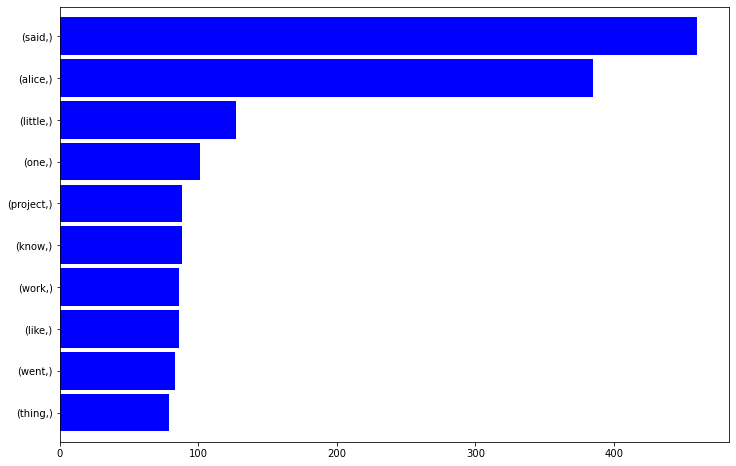

In [8]:
unigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [9]:
print("2-gram: ", extract_ngrams(' '.join(clean_data), 2))

2-gram:  ['project gutenberg', 'gutenberg ebook', 'ebook alices', 'alices adventure', 'adventure wonderland', 'wonderland lewis', 'lewis carroll', 'carroll ebook', 'ebook use', 'use anyone', 'anyone anywhere', 'anywhere united', 'united state', 'state part', 'part world', 'world cost', 'cost almost', 'almost restriction', 'restriction whatsoever', 'whatsoever may', 'may copy', 'copy give', 'give away', 'away reuse', 'reuse term', 'term project', 'project gutenberg', 'gutenberg license', 'license included', 'included ebook', 'ebook online', 'online wwwgutenbergorg', 'wwwgutenbergorg located', 'located united', 'united state', 'state check', 'check law', 'law country', 'country located', 'located using', 'using ebook', 'ebook title', 'title alices', 'alices adventure', 'adventure wonderland', 'wonderland author', 'author lewis', 'lewis carroll', 'carroll release', 'release date', 'date january', 'january 1991', '1991 ebook', 'ebook 11', '11 recently', 'recently updated', 'updated october

In [10]:
bigrams_series = (pd.Series(nltk.ngrams(clean_data, 2)).value_counts())[:10]

<AxesSubplot:>

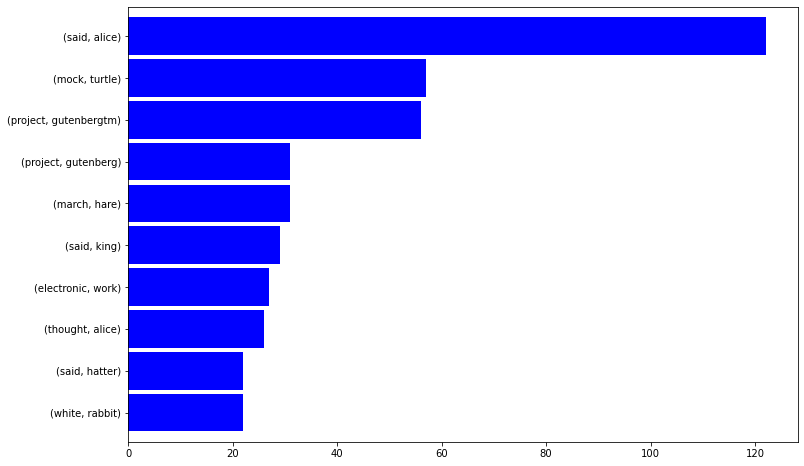

In [11]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

In [12]:
print("3-gram: ", extract_ngrams(' '.join(clean_data), 3))

3-gram:  ['project gutenberg ebook', 'gutenberg ebook alices', 'ebook alices adventure', 'alices adventure wonderland', 'adventure wonderland lewis', 'wonderland lewis carroll', 'lewis carroll ebook', 'carroll ebook use', 'ebook use anyone', 'use anyone anywhere', 'anyone anywhere united', 'anywhere united state', 'united state part', 'state part world', 'part world cost', 'world cost almost', 'cost almost restriction', 'almost restriction whatsoever', 'restriction whatsoever may', 'whatsoever may copy', 'may copy give', 'copy give away', 'give away reuse', 'away reuse term', 'reuse term project', 'term project gutenberg', 'project gutenberg license', 'gutenberg license included', 'license included ebook', 'included ebook online', 'ebook online wwwgutenbergorg', 'online wwwgutenbergorg located', 'wwwgutenbergorg located united', 'located united state', 'united state check', 'state check law', 'check law country', 'law country located', 'country located using', 'located using ebook', 'u

In [13]:
trigrams_series = (pd.Series(nltk.ngrams(clean_data, 3)).value_counts())[:10]

<AxesSubplot:>

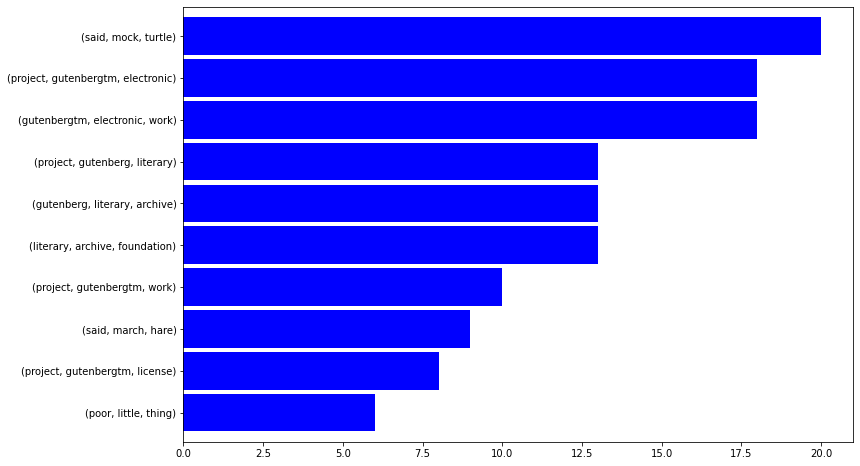

In [14]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

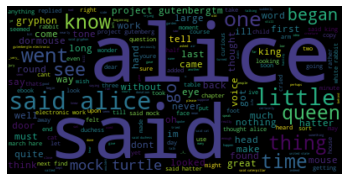

In [15]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(clean_data))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### (2) Find the top 20 most important words

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True,norm='l2',encoding='utf-8',ngram_range=(1,1), 
                        stop_words='english')

response = tfidf.fit_transform([' '.join(clean_data)])
    
feature_array = np.array(tfidf.get_feature_names())
tfidf_sorting = np.argsort(response.toarray()).flatten()[::-1]

n = 30
top_n = feature_array[tfidf_sorting][:n]

C:\Users\rheyannmagcalas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
top_n

array(['said', 'alice', 'little', 'project', 'know', 'work', 'like',
       'went', 'thing', 'queen', 'thought', 'time', 'king', 'turtle',
       'dont', 'head', 'hatter', 'mock', 'began', 'way', 'gutenbergtm',
       'gryphon', 'say', 'im', 'quite', 'cat', 'think', 'voice', 'come',
       'rabbit'], dtype='<U40')